## 1.1 import data

In [1]:
import os 
import nibabel as nib
import numpy as np
# load pMCI dataset and sMCI dataset
pMCI_path = r'E:\data\pMCI\ADNI'
sMCI_path = r'E:\data\sMCI\ADNI'
pMCI = []
sMCI = []


pfiles = os.listdir(pMCI_path)
# Traverse the folder
for i in pfiles: 
    # Construct absolute path
    position = pMCI_path+'\\'+ i 
    pff=os.listdir(position)
    for ii in pff:
        position = pMCI_path+'\\'+ i +'\\'+ ii
        pfff=os.listdir(position)
        for iii in pfff:
            position = pMCI_path+'\\'+ i +'\\'+ ii+'\\'+ iii
            pffff=os.listdir(position)
            for iiii in pffff:
                position = pMCI_path+'\\'+ i +'\\'+ ii+'\\'+ iii +'\\'+ iiii
                pfffff=os.listdir(position)
                for file in pfffff:
                    position = pMCI_path+'\\'+ i +'\\'+ ii+'\\'+ iii +'\\'+ iiii+'\\'+ file
                    # read the nifti file
                    img=nib.load(position)
                    # convert to array
                    img_arr=img.get_fdata()
                    img_arr=np.squeeze(img_arr)
                    # show the shape of the array
                    print(img_arr.shape)
                    pMCI.append(img_arr)
                    
sfiles = os.listdir(sMCI_path)
# Traverse the folder
for i in sfiles: 
    # Construct absolute path
    position = sMCI_path+'\\'+ i 
    sff=os.listdir(position)
    for ii in sff:
        position = sMCI_path+'\\'+ i +'\\'+ ii
        sfff=os.listdir(position)
        for iii in sfff:
            position = sMCI_path+'\\'+ i +'\\'+ ii+'\\'+ iii
            sffff=os.listdir(position)
            for iiii in sffff:
                position = sMCI_path+'\\'+ i +'\\'+ ii+'\\'+ iii +'\\'+ iiii
                sfffff=os.listdir(position)
                for file in sfffff:
                    position = sMCI_path+'\\'+ i +'\\'+ ii+'\\'+ iii +'\\'+ iiii+'\\'+ file
                    # read the nifti file
                    img=nib.load(position)
                    # convert to array
                    img_arr=img.get_fdata()
                    img_arr=np.squeeze(img_arr)
                    # show the shape of the array
                    print(img_arr.shape)
                    sMCI.append(img_arr)
# check
print("the number of sMCI image is",len(sMCI))
print("the number of pMCI image is",len(pMCI))

(192, 192, 160)
(256, 256, 170)
(256, 256, 170)
(240, 256, 160)
(192, 192, 160)
(240, 256, 160)
(192, 192, 160)
(240, 256, 160)
(192, 192, 160)
(192, 192, 160)
(192, 192, 160)
(192, 192, 160)
(192, 192, 160)
(160, 192, 192)
(256, 256, 170)
(256, 256, 170)
(256, 256, 170)
(256, 256, 170)
(192, 192, 160)
(192, 192, 160)
(192, 192, 160)
(192, 192, 160)
(192, 192, 160)
(170, 256, 256)
(170, 256, 256)
(170, 256, 256)
(170, 256, 256)
(170, 256, 256)
(170, 256, 256)
(170, 256, 256)
(170, 256, 256)
(176, 240, 256)
(176, 240, 256)
(176, 240, 256)
(176, 240, 256)
(176, 240, 256)
(176, 240, 256)
(176, 240, 256)
(176, 240, 256)
(176, 240, 256)
(176, 240, 256)
(176, 240, 256)
(176, 240, 256)
(176, 240, 256)
(176, 240, 256)
(176, 240, 256)
the number of sMCI image is 25
the number of pMCI image is 21


## 1.2 check image

Randomly choose 3 image in sMCI dataset and 3 image in pMCI dataset to visualize
sMCI


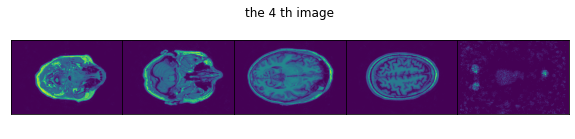

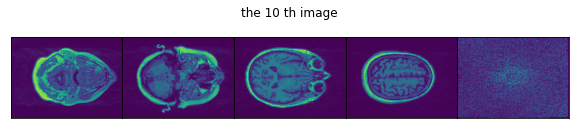

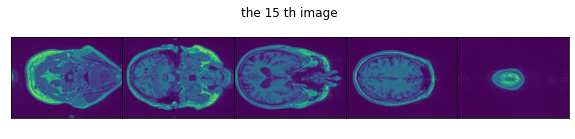

pMCI


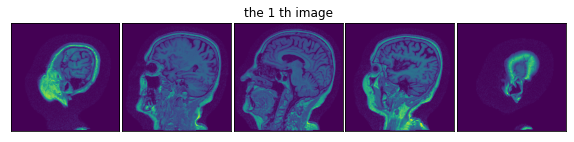

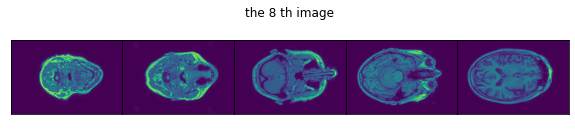

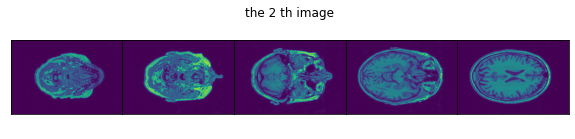

In [2]:
import random
import matplotlib.pyplot as plt
# visualize 3+3 image from sMCI and pMCI
print("Randomly choose 3 image in sMCI dataset and 3 image in pMCI dataset to visualize")
def visualize(data,num=3,seed=567):
    random.seed(seed)
    for i in random.sample(range(len(data)),num):
        n=data[i].shape[2]
        n1=int(n/6)
        n2=int(2*n/6)
        n3=int(3*n/6)
        n4=int(4*n/6)
        n5=int(5*n/6)
        L=[n1,n2,n3,n4,n5]
        fig = plt.figure(figsize=(10,2))
        plt.axis('off')
        fig.subplots_adjust(hspace=0, wspace=0)
        plt.title("the %d th image" % i)
        for j in range(1,6):
            ax = fig.add_subplot(1, 5, j)
            plt.xticks([])
            plt.yticks([])
            ax.imshow(sMCI[i][:,:,L[j-1]])
        plt.show()

print("sMCI")
visualize(sMCI)
print("pMCI")
visualize(pMCI,seed=123)

# 2. preprocess
## 2.1 resize image

sMCI


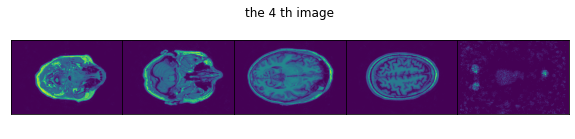

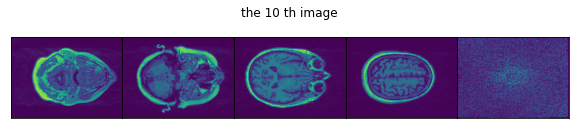

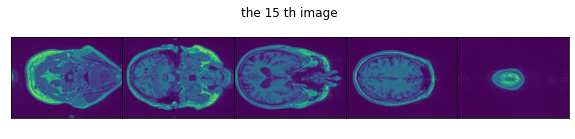

pMCI


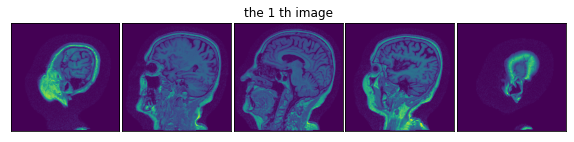

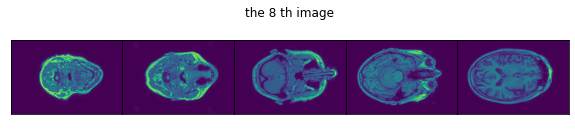

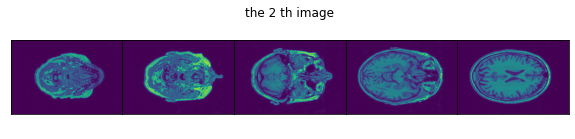

In [3]:
from skimage.transform import resize
sMCI_res=[]
for i in range(len(sMCI)):
    res = resize(sMCI[i], (256, 256, 256))
    sMCI_res.append(res)

pMCI_res=[]
for i in range(len(pMCI)):
    res = resize(pMCI[i], (256, 256, 256))
    pMCI_res.append(res)

# check
print("sMCI")
visualize(sMCI)
print("pMCI")
visualize(pMCI,seed=123)

In [11]:
import pandas as pd
# combine image and label to a dataframe
# sMCI=0,pMCI=1
MCI_res=sMCI_res+pMCI_res
a=list(1 for i in range(1,26))
b=list(0 for i in range(1,22))
label=a+b
print(MCI_res)

[array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0

## 2.2 data augmentation

In [12]:
from keras.preprocessing.image import ImageDataGenerator
# define a data generator which can randomly shift data,randomly rotate data, randomly flip data and randomly zoom data
datagen=ImageDataGenerator(rotation_range=90,
                           width_shift_range=0.3, 
                           height_shift_range=0.3,
                           horizontal_flip=True, 
                           vertical_flip=True,
                           zoom_range=0.3)
# use sMCI and pMCI to train the generator 
datagen.fit(MCI_res)

#datagen1.flow_from_dataframe(dataframe=df,
#                            x_col=)


MemoryError: Unable to allocate 2.88 GiB for an array with shape (46, 256, 256, 256) and data type float32

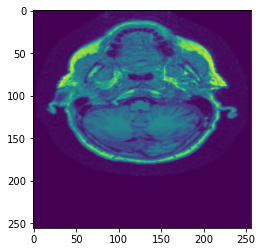

In [8]:
# use the generator to generate batch data
MCI_gen=datagen.random_transform(MCI_res[1],seed=8364)
plt.imshow(MCI_gen[100,:,:])

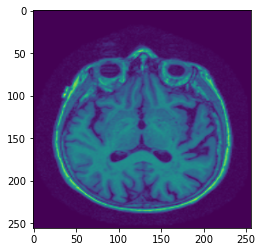

In [9]:
plt.imshow(sMCI_res[1][100,:,:])

## 2.3 Normalization

In [ ]:
max_list=[]
MCI_norm=[]
for i in range(len(MCI_res)):
    print(np.array(MCI_res[i]).shape)
    maximg=np.array(MCI_res[i]).max()
    MCI_norm.append(MCI_res[i]/maximg)
    max_list.append(maximg)
# = norm.inverse_transform(MCI_norm)
MCI_norm

# 3. bulid model
I try to use GoogLeNet and ResNet18, and compare them.
## 3.1 GoogLeNet

In [ ]:
import import_ipynb
from Imp_GoogLeNet import *
model = GoogLeNet()
model.summary()

## 3.2 ResNet18

In [ ]:
import torchvision.models as models
resnet18 = models.resnet18()
resnet18

# 4 model evaluation
## 4.1 confusion matrix，accuracy and F1 score

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import seaborn as sns

def plot_cm(x,y):
    '''this function is used to plot confusion matrix'''
    n=cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]
    acc=(cm[0][0]+)cm[1][1]
    print("the accuracy is", acc)
    cm = confusion_matrix(x,y)
    ax=sns.heatmap(cm_bow,fmt='g',annot=True,cmap='Blues') 
    ax.set_title('confusion matrix') 
    ax.set_xlabel('predict') 
    ax.set_ylabel('acture') 
    plt.show()

print("the f1 score is",f1_score(y_true, y_pred, average='macro')

## 4.2 roc curve and auc value

In [ ]:
from sklearn.metrics import roc_curve,auc
import numpy as np

def plot_roc(x,y):
    '''this function is use to plot roc curve and find auc'''
    fpr, tpr, _ =roc_curve(x,y)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (auc = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()